# 🏋️‍♂️ Proyecto Sprint 13: Predicción de cancelación de clientes - Model Fitness

## Descripción del proyecto

La cadena de gimnasios **Model Fitness** está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios (y muchos otros servicios por suscripción) es la **pérdida de clientes**. Pero, ¿cómo se detecta realmente que un/a cliente ya no está contigo? Puede observarse cuando las personas cancelan sus cuentas o no renuevan sus contratos. Sin embargo, muchas veces no es tan obvio: algunas personas simplemente **dejan de asistir sin avisar**, como si se fueran "de puntillas".

Los **indicadores de pérdida** varían según el tipo de negocio. Por ejemplo, un cliente de una tienda en línea puede comprar con poca frecuencia, pero aún así considerarse activo. En cambio, si alguien deja de abrir un canal que se actualiza diariamente durante dos semanas, probablemente se ha desinteresado.

En el caso de los gimnasios, **no asistir durante un mes completo** suele ser un buen indicio de que la persona ha abandonado el servicio. Aunque existen excepciones (vacaciones, enfermedades, etc.), la mayoría de los usuarios que desaparecen por tanto tiempo no regresan.

Con el fin de **combatir la rotación (churn)**, Model Fitness ha digitalizado los perfiles de sus clientes. Nuestra tarea consiste en **analizar esta base de datos y proponer una estrategia de retención basada en datos**.

## Objetivos del proyecto

- **Predecir la probabilidad de pérdida** (para el próximo mes) de cada cliente.
- **Elaborar retratos de usuarios típicos**: identificar los grupos más representativos y describir sus características.
- **Analizar los factores que influyen en la cancelación**.
- **Generar conclusiones y recomendaciones** para mejorar la atención al cliente:
  - Identificar grupos objetivo.
  - Sugerir medidas concretas para reducir la rotación.
  - Detectar patrones relevantes en la interacción con los clientes.


# Análisis exploratorio de datos

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
gym = pd.read_csv('gym_churn_us.csv')

In [12]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [13]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### ✅ Calidad de los datos
- No se encontraron **valores ausentes** en el dataset.
- Las columnas están correctamente tipadas como `int` o `float`, y los datos están listos para análisis.

In [19]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### 📉 Estadísticas generales
El método `.describe()` reveló lo siguiente:
- La mayoría de los clientes tienen contratos de 1 o 12 meses.
- La antigüedad (`Lifetime`) varía mucho: algunos apenas se unieron, otros llevan más de 30 meses.
- La frecuencia promedio de clases está en torno a 2 visitas por semana.
- Hay diferencias notables en gasto adicional, edad, y participación en visitas grupales.

In [20]:
gym.groupby('Churn').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### 📊 Promedios por grupo (`Churn`)
Comparando clientes que se quedaron (`Churn = 0`) vs. los que se fueron (`Churn = 1`), se detectaron estos patrones:

| Variable                          | Se quedaron | Se fueron | Diferencia relevante                             |
|----------------------------------|-------------|-----------|--------------------------------------------------|
| `Contract_period`                | 5.74        | 1.73      | Contratos largos retienen más.                   |
| `Lifetime`                       | 4.71        | 0.99      | Usuarios nuevos tienden a irse.                  |
| `Avg_class_frequency_total`      | 2.02        | 1.47      | Mayor frecuencia total reduce churn.             |
| `Avg_class_frequency_current_month` | 2.02     | 1.04      | Menos visitas este mes = riesgo de cancelación.  |
| `Promo_friends`                  | 0.35        | 0.18      | Referencias de amigos retienen mejor.            |
| `Partner`                        | 0.53        | 0.36      | Tener empresa asociada ayuda a retener.          |
| `Group_visits`                   | 0.46        | 0.27      | Clases grupales ayudan a fidelizar.              |


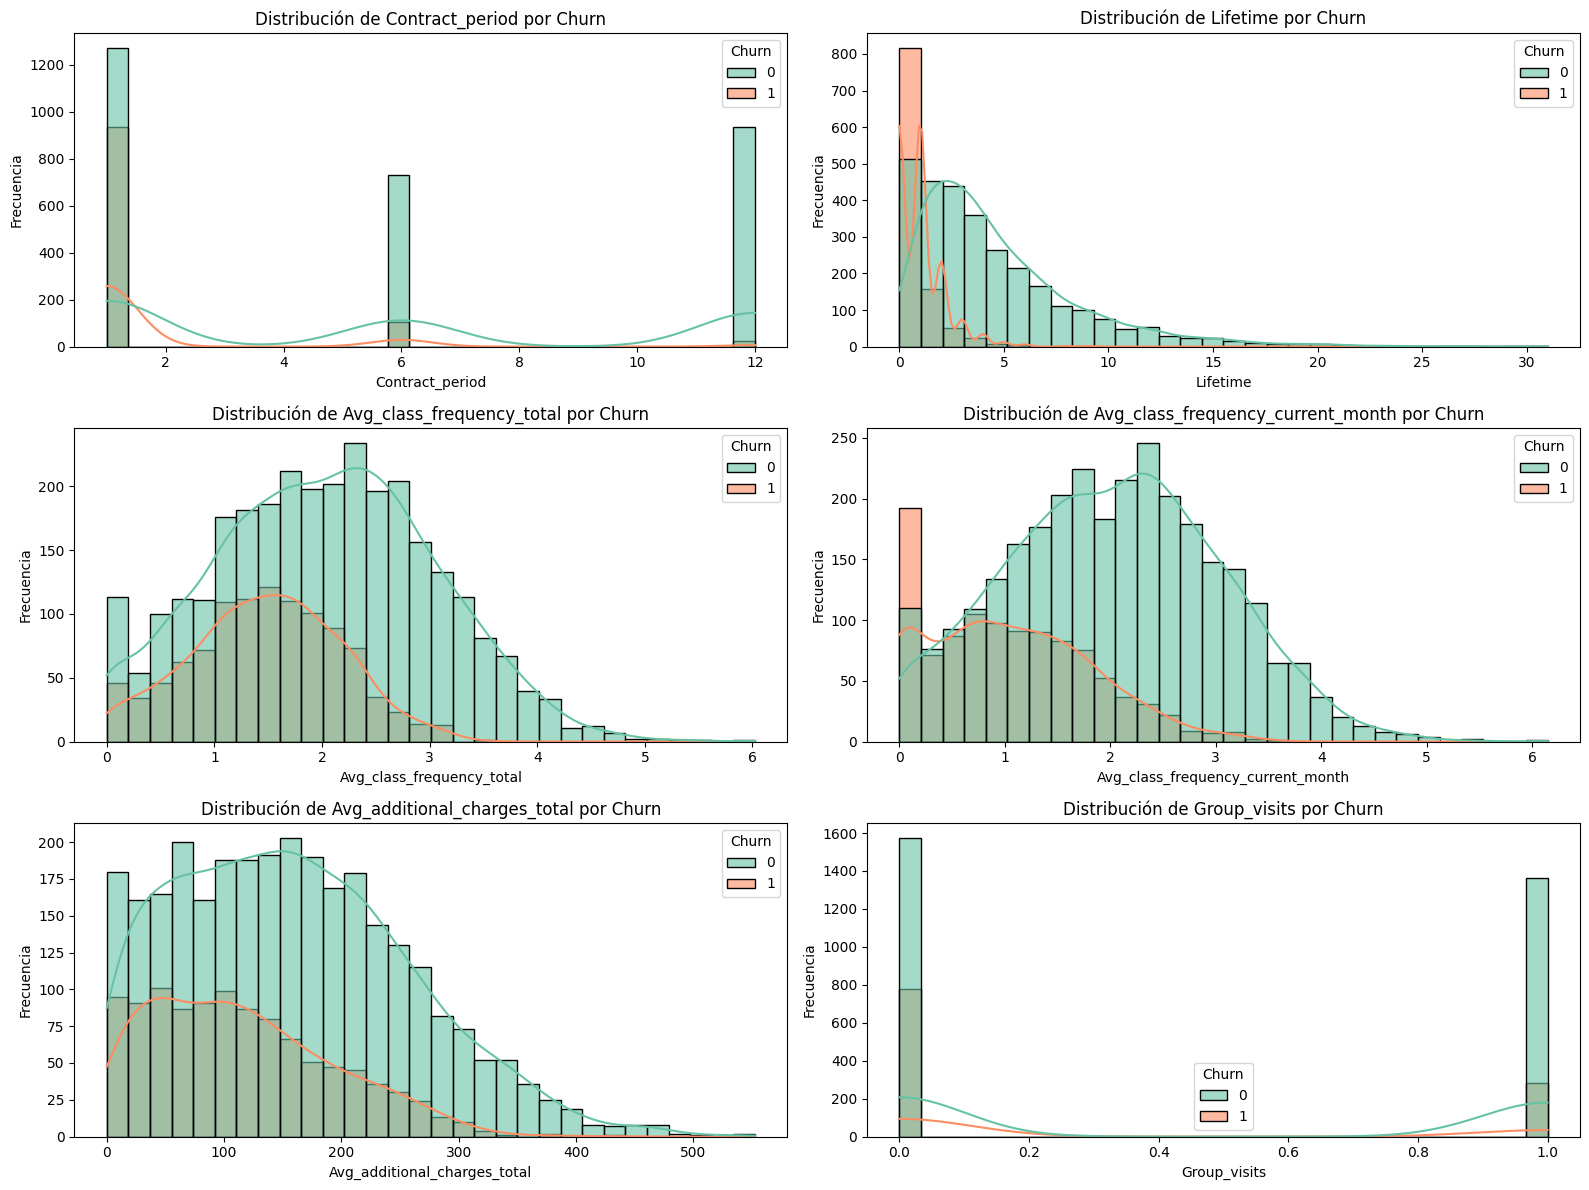

In [21]:
# Lista de variables a graficar
features = [
    'Contract_period', 'Lifetime',
    'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
    'Avg_additional_charges_total', 'Group_visits'
]

# Creamos gráficos
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=gym, x=feature, hue='Churn', kde=True, bins=30, palette='Set2', alpha=0.6)
    plt.title(f'Distribución de {feature} por Churn')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


### 📈 Distribuciones por grupo

Se graficaron histogramas para comparar clientes con y sin cancelación. Los gráficos mostraron que:

- Los contratos de corto plazo y la poca actividad se asocian claramente con el churn.
- Los que gastan más en servicios adicionales y hacen más visitas, tienden a quedarse.
- Los que participan en **clases grupales** también muestran menor propensión a irse.

### 🔹 Contract_period
- Se nota una diferencia clara: quienes tienen contratos de **1 mes** (a la izquierda) son los que más se van.
- Los contratos de **12 meses** tienen una tasa de cancelación mucho menor.  
✅ **Conclusión**: contrato corto = alto riesgo de churn.

### 🔹 Lifetime
- La mayoría de los usuarios que se van han estado **menos de 1 mes**.
- A mayor antigüedad, menor probabilidad de abandono.  
✅ **Conclusión**: el primer mes es **crítico para la retención**.

### 🔹 Avg_class_frequency_total
- Los que **se quedan** asisten con más regularidad (la curva se desplaza a la derecha).  
✅ **Conclusión**: baja frecuencia de asistencia está ligada al abandono.

### 🔹 Avg_class_frequency_current_month
- El patrón se repite: usuarios **activos este mes** tienen menor cancelación.  
✅ **Conclusión**: un **descenso en la frecuencia actual** puede predecir el churn.

### 🔹 Avg_additional_charges_total
- Los clientes que gastan más en **servicios adicionales** (cafetería, masajes, etc.) tienden a quedarse.  
✅ **Conclusión**: compromiso financiero indica **mayor lealtad**.

### 🔹 Group_visits
- Gran diferencia: los que participan en **clases grupales** se quedan más.  
✅ **Conclusión**: la **interacción social** parece tener un efecto protector.


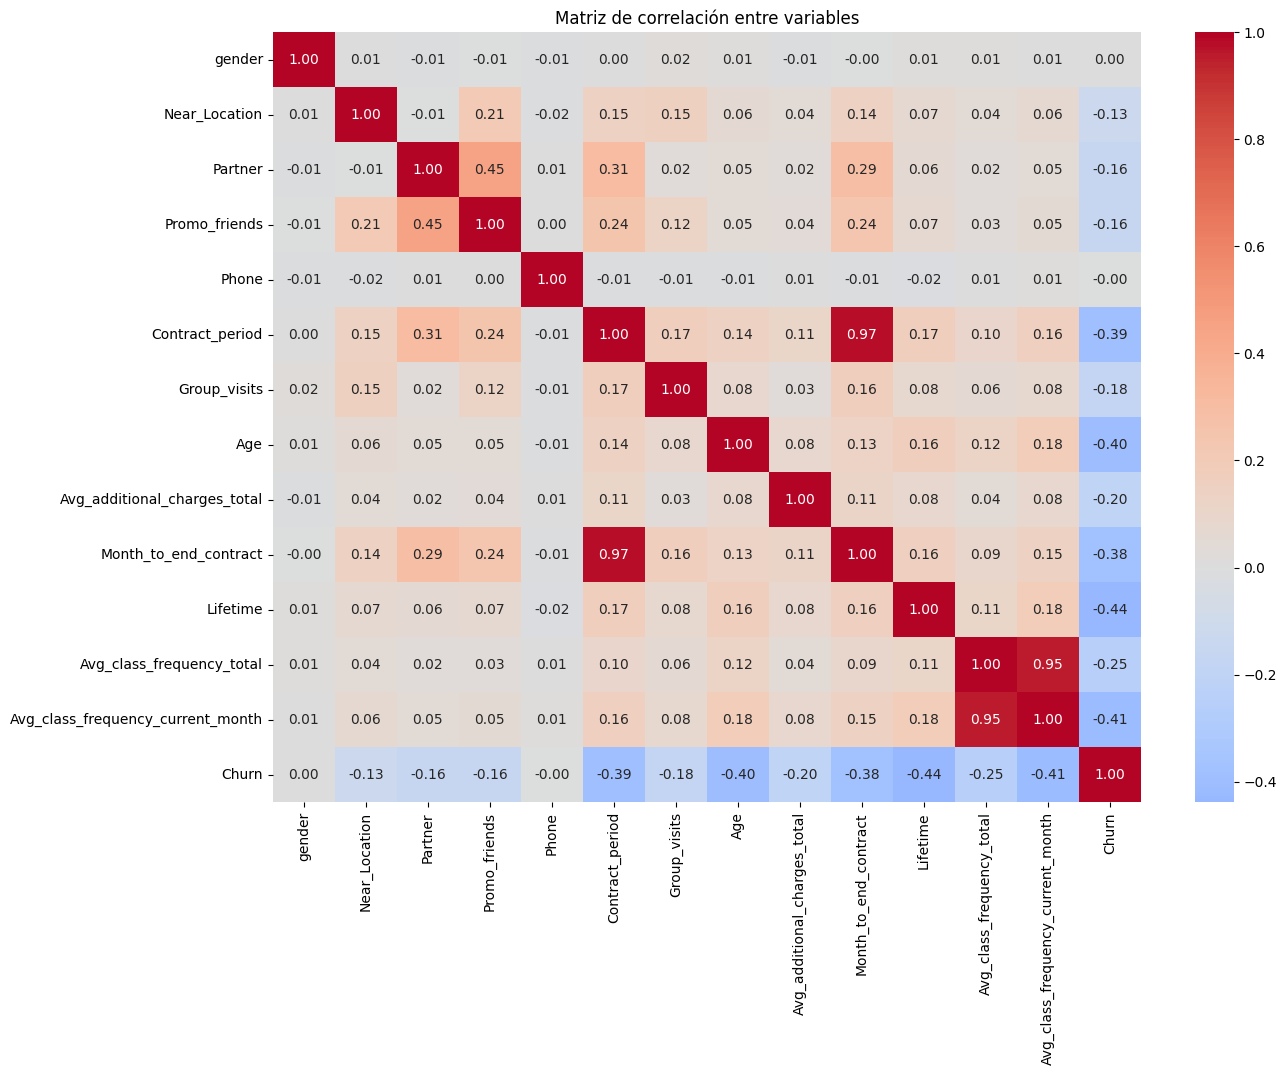

In [18]:
# Calculamos la matriz de correlación
correlation_matrix = gym.corr()

# Visualizamos con un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables')
plt.show()


### 🔗 Matriz de correlación

La matriz de correlación confirmó que las variables más relacionadas con el churn son:

| Variable                             | Correlación con `Churn` |
|-------------------------------------|--------------------------|
| `Avg_class_frequency_current_month` | -0.41                    |
| `Contract_period`                   | -0.39                    |
| `Month_to_end_contract`            | -0.38                    |
| `Age`                               | -0.40                    |
| `Lifetime`                          | -0.25                    |
| `Group_visits`                      | -0.18                    |
| `Avg_additional_charges_total`      | -0.20                    |

📌 Estas correlaciones negativas indican que **menos compromiso, menos frecuencia y menos antigüedad aumentan la probabilidad de cancelación**.


### 🧠 Conclusión general 
> El churn está fuertemente ligado a factores como:
> - Contratos cortos
> - Poca actividad reciente
> - Clientes nuevos
> - No participación en grupos
> - Bajo gasto adicional



# Construir modelo

In [27]:
# Separar variables predictoras y objetivo
X = gym.drop('Churn', axis=1)
y = gym['Churn']


In [32]:
#Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Inicializar modelos
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Entrenar
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
log_preds = log_model.predict(X_valid)
rf_preds = rf_model.predict(X_valid)

# Evaluación
print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_valid, log_preds))
print("Precision:", precision_score(y_valid, log_preds))
print("Recall:", recall_score(y_valid, log_preds))

print("\n🌲 Bosque Aleatorio")
print("Accuracy:", accuracy_score(y_valid, rf_preds))
print("Precision:", precision_score(y_valid, rf_preds))
print("Recall:", recall_score(y_valid, rf_preds))


📊 Regresión Logística
Accuracy: 0.92375
Precision: 0.8756218905472637
Recall: 0.8301886792452831

🌲 Bosque Aleatorio
Accuracy: 0.925
Precision: 0.8838383838383839
Recall: 0.8254716981132075


## 🤖 Comparación de modelos: Regresión Logística vs. Bosque Aleatorio

Se entrenaron dos modelos de clasificación binaria para predecir si un cliente cancelará su suscripción el próximo mes:

- **Regresión Logística**: modelo simple, lineal e interpretable.
- **Bosque Aleatorio**: modelo no lineal basado en múltiples árboles de decisión.

### 📊 Resultados de evaluación

| Métrica      | Regresión Logística | Bosque Aleatorio |
|--------------|---------------------|------------------|
| **Accuracy** | 92.38%              | **92.50%**       |
| **Precision**| 87.56%              | **88.38%**       |
| **Recall**   | **83.02%**          | 82.55%           |

### 🧠 Interpretación

- Ambos modelos ofrecen un desempeño sólido con una precisión general superior al 92%.
- El **Bosque Aleatorio** supera ligeramente en precisión, lo que significa que comete menos falsos positivos (predice mejor quién realmente se va).
- La **Regresión Logística** tiene una leve ventaja en recall, detectando mejor a quienes efectivamente abandonan el gimnasio.

---

### ✅ Elección del modelo final

Se opta por **usar el modelo de Bosque Aleatorio** debido a su:

- **Mayor precisión**, lo que reduce alarmas innecesarias a clientes que no planean cancelar.
- **Excelente desempeño general**, casi idéntico al modelo lineal pero con más flexibilidad.
- **Capacidad adicional para analizar la importancia de las características** del modelo, lo cual es clave para interpretar los factores que influyen en la cancelación.

> Este modelo nos permitirá no solo hacer predicciones precisas, sino también comprender mejor qué variables afectan la decisión del cliente de irse o quedarse.


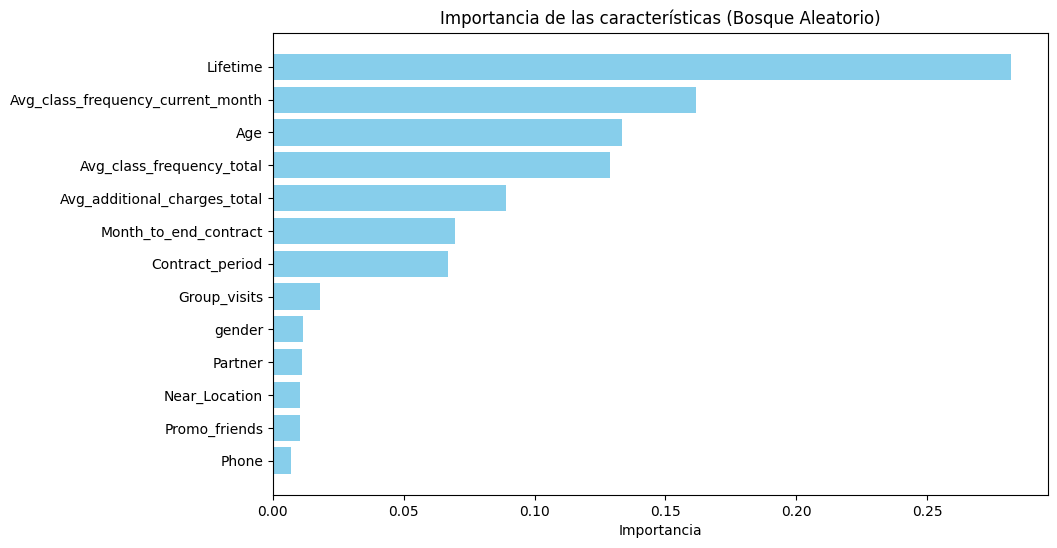

In [31]:
# Extraer importancias del modelo
importances = rf_model.feature_importances_
features = X.columns

# Crear DataFrame ordenado
feat_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Mostrar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['feature'], feat_importances['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las características (Bosque Aleatorio)')
plt.gca().invert_yaxis()
plt.show()

## 🌟 Importancia de las características (Feature Importance)

El modelo de **Bosque Aleatorio** nos permite identificar qué variables fueron más determinantes para predecir si un cliente cancelará o no su membresía.

### 🔝 Variables más influyentes

1. **`Lifetime`**  
   - Es la variable más importante del modelo.
   - Clientes con menos tiempo en el gimnasio tienen un riesgo mucho mayor de cancelar.  
   ✅ *Conclusión:* los primeros meses son clave para retener al cliente.

2. **`Avg_class_frequency_current_month`**  
   - Clientes que reducen su frecuencia de visitas en el mes actual tienden a irse.  
   ✅ *Conclusión:* la inactividad reciente es un fuerte indicador de churn inminente.

3. **`Age`**  
   - Los usuarios más jóvenes presentan mayor riesgo de cancelar.  
   ✅ *Conclusión:* podrían requerir estrategias de fidelización distintas.

4. **`Avg_class_frequency_total`**  
   - Frecuencias de asistencia más bajas a lo largo del tiempo indican menor compromiso.  
   ✅ *Conclusión:* quienes tienen hábitos de visita más constantes permanecen por más tiempo.

5. **`Avg_additional_charges_total`**  
   - Los usuarios que consumen servicios adicionales (cafetería, masajes, etc.) tienden a quedarse más.  
   ✅ *Conclusión:* fomentar el uso de servicios extra puede aumentar la retención.

---

### 🔽 Variables con menor influencia

- `Promo_friends`, `Partner`, `Near_Location`, `Phone`, etc. tienen baja importancia en el modelo.
- Sin embargo, podrían usarse como criterios secundarios para segmentar o personalizar estrategias comerciales.

---

### 🧠 Conclusión

> El modelo destaca la **antigüedad**, la **frecuencia de visitas**, la **edad** y el **gasto adicional** como factores clave para predecir la cancelación.  
> Estas variables serán fundamentales al momento de hacer recomendaciones estratégicas para retención.


# Análisis de clústeres

In [33]:
from sklearn.preprocessing import StandardScaler

# Quitamos la columna 'Churn'
X_cluster = gym.drop('Churn', axis=1)

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


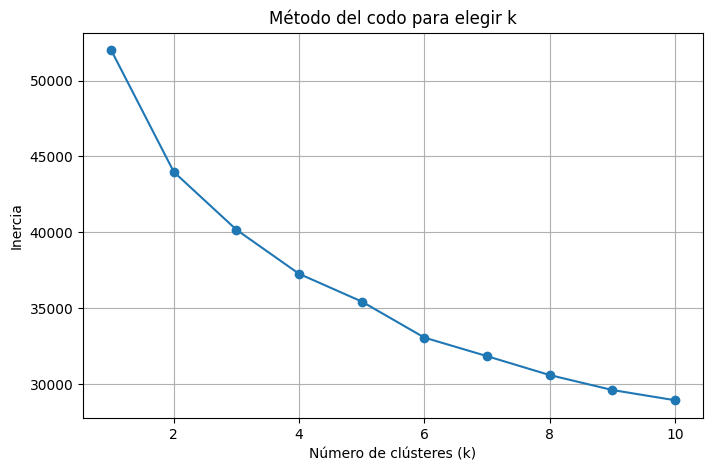

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Probar valores de k del 1 al 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo para elegir k')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [35]:
# Entrenar modelo KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clústeres como una nueva columna al DataFrame original
gym['cluster'] = clusters

# Mostrar la cantidad de usuarios por clúster
gym['cluster'].value_counts().sort_index()


cluster
0    1643
1    1196
2    1161
Name: count, dtype: int64

In [36]:
# Ver promedios por clúster
gym.groupby('cluster').mean(numeric_only=True).round(2)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.49,0.76,0.38,0.19,0.91,1.88,0.29,28.06,127.95,1.79,2.23,1.22,0.97,0.56
1,0.51,0.94,0.78,0.57,0.90,10.70,0.54,29.89,161.95,9.79,4.68,1.96,1.95,0.03
2,0.55,0.87,0.34,0.22,0.90,2.45,0.45,30.04,158.36,2.28,4.85,2.72,2.71,0.09


## 👥 Segmentación de clientes (KMeans con k=3)

Se aplicó el algoritmo de KMeans para identificar grupos de clientes con comportamientos similares. El análisis reveló **tres clústeres bien definidos**:

---

### 🔵 Clúster 0 – Clientes en riesgo alto de cancelación

- **Churn:** 56%
- **Contrato corto**: 1.88 meses
- **Poca frecuencia de visitas actual**: 0.97 veces/semana
- **Lifetime bajo**: 2.23 meses (recién inscritos)
- **Poca participación en clases grupales** y **bajo gasto adicional**

✅ **Conclusión:** Este grupo representa a los **clientes nuevos y poco activos**, con alto riesgo de abandonar el gimnasio. Necesitan atención inmediata (promociones, seguimiento, motivación).

---

### 🟢 Clúster 1 – Clientes fieles y comprometidos

- **Churn:** 3%
- **Contrato largo**: 10.7 meses
- **Alta participación grupal**
- **Buena frecuencia**: 1.95 veces/semana
- **Lifetime alto**: 4.68 meses
- **Mayor gasto en servicios adicionales**

✅ **Conclusión:** Este grupo es el más **estable y rentable**. Deben mantenerse satisfechos, ya que podrían actuar como embajadores o promotores del gimnasio.

---

### 🔴 Clúster 2 – Clientes activos con riesgo moderado

- **Churn:** 9%
- **Buena frecuencia total y actual**: 2.72 veces/semana
- **Lifetime alto**: 4.85 meses
- **Contrato más corto**: 2.45 meses

✅ **Conclusión:** Son usuarios **altamente activos**, pero con contratos más cortos. Representan una buena oportunidad para estrategias de **renovación de contrato** y **beneficios por permanencia**.

---

### 📌 Resumen de los grupos

| Clúster | Tipo de usuario             | Churn | Acción recomendada                          |
|--------:|-----------------------------|------:|---------------------------------------------|
|   0     | Nuevos, inactivos           | 56%   | Intervención urgente para evitar pérdida    |
|   1     | Fieles, comprometidos       | 3%    | Mantener motivados y convertir en promotores|
|   2     | Activos, contratos cortos   | 9%    | Incentivar renovación y permanencia         |


# Conclusiones 

## 🧠 Conclusiones generales

1. **La cancelación de clientes (churn)** está estrechamente relacionada con:
   - Baja frecuencia de visitas (especialmente en el mes actual).
   - Contratos cortos (1 mes).
   - Baja antigüedad en el gimnasio.
   - Poca participación en clases grupales.
   - Bajo gasto en servicios adicionales.
   - Usuarios jóvenes tienden a cancelar más.

2. El modelo de **bosque aleatorio** demostró ser el más preciso, con un 92.5% de exactitud, y reveló que las variables más importantes para predecir la cancelación son:
   - `Lifetime`
   - `Avg_class_frequency_current_month`
   - `Age`
   - `Contract_period`
   - `Avg_additional_charges_total`

3. Se identificaron **tres clústeres de clientes**:
   - Un grupo fiel y comprometido (Churn 3%)
   - Un grupo muy activo pero con contratos cortos (Churn 9%)
   - Un grupo de alto riesgo, con contratos cortos y poca actividad (Churn 56%)

---

## 🎯 Recomendaciones para retención

1. **Segmentar a los usuarios nuevos con bajo engagement** y activar campañas específicas:
   - Ofrecer clases de bienvenida, acompañamiento personalizado o promociones cruzadas.
   - Alertas automáticas para quienes disminuyen su frecuencia.

2. **Incentivar la permanencia**:
   - Ofrecer beneficios progresivos por renovar contratos (descuentos, productos, acceso premium).
   - Promociones para pasar de contratos cortos a largos.

3. **Fomentar el uso de servicios adicionales**:
   - Bonificaciones por gastar en cafetería, productos o masajes.
   - Paquetes mensuales que incluyan entrenamientos + servicios extra.

4. **Aprovechar el grupo de usuarios fieles**:
   - Promover programas de referidos (trae a un amigo).
   - Usar su testimonio para atraer nuevos clientes.

5. **Monitorear actividad mensual**:
   - Crear alertas internas para usuarios con frecuencia semanal por debajo de 1.0.
   - Automatizar correos o llamadas de retención si detectan deserción probable.

---

> Con estas acciones basadas en datos, Model Fitness puede reducir significativamente su tasa de cancelación y mejorar la experiencia de sus clientes.
